<h1>Important Packages</h1>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, threshold=np.inf)
%matplotlib widget

<h1>Functions</h1>

In [13]:
# Himelblau Functon in two variable
def Himelblau(arr):
    x1,x2 = arr
    return ((x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2)
def Alkey(arr):
    x = arr[0]
    y = arr[1]
    return -20*np.exp(-0.2*np.sqrt((x**2 + y**2)))

<h1>PSO Algorithm</h1>

In [98]:
def PSO(Obj_fun, population_size, lb, ub, iter):
    """
    population_size = Number of swarm particle
    dimension = Enter number of variables, put n = 2
    iter = Enter number of iterations to be performed
    """
    dimension = len(lb);
    lb, ub = np.array(lb), np.array(ub)
    
    #Initializing random position of swarm particles
    X_particle = (lb + (ub - lb))*np.random.rand(population_size,dimension)
    #Initializing random velocity of each swarm particles
    V = np.random.rand(population_size,dimension)
    #Evaluating initial fitness
    fit_val = np.array([Obj_fun(xi) for xi in X_particle])

    #Initially local best is same as particle position 
    P_lb = X_particle
    #Global best is particle with minimum fitness -> Since its minimisation problem so we take min fit value
    P_gb = X_particle[np.argmin(fit_val)]
    
    w = 1
    c1 = 1
    c2 = 1
    for t in range(iter):
        r = np.random.rand(population_size,2)
        #Array of P_gb
        P_GB = P_gb.reshape(1,-1).repeat(population_size, axis = 0)
        #V_new
        V = w * V + c1 * r[:, [0]] * (P_lb - X_particle) + c2 * r[:, [1]] * (P_GB - X_particle)        
        #X-new
        X_particle += V

        X_particle = np.clip(X_particle, lb, ub)
        #Updating the local best
        new_fitness = np.array([Obj_fun(xi) for xi in X_particle])
        improved = new_fitness < fit_val
        P_lb[improved] = X_particle[improved]
        fit_val[improved] = new_fitness[improved]
                
        P_gb = P_lb[np.argmin(fit_val)]
        if(t%25 ==0):
            print(f'Solution is at {t}th iteration is: ', P_gb)
    return P_gb


<h1>Calling Optimization by PSO on Objective function</h1>

In [104]:
lb = [-10, -10]  # Lower bounds
ub = [10, 10]  # Upper bounds
param = PSO(Alkey, 10, lb, ub, 500)

Solution is at 0th iteration is:  [4.155 2.24 ]
Solution is at 25th iteration is:  [-0.092  0.026]
Solution is at 50th iteration is:  [-0.092  0.026]
Solution is at 75th iteration is:  [-0.092  0.026]
Solution is at 100th iteration is:  [-0.092  0.026]
Solution is at 125th iteration is:  [-0.018  0.076]
Solution is at 150th iteration is:  [-0.018  0.076]
Solution is at 175th iteration is:  [-0.018  0.076]
Solution is at 200th iteration is:  [-0.018  0.076]
Solution is at 225th iteration is:  [-0.018  0.076]
Solution is at 250th iteration is:  [-0.018  0.076]
Solution is at 275th iteration is:  [-0.018  0.076]
Solution is at 300th iteration is:  [-0.018  0.076]
Solution is at 325th iteration is:  [-0.018  0.076]
Solution is at 350th iteration is:  [-0.009 -0.003]
Solution is at 375th iteration is:  [-0.009 -0.003]
Solution is at 400th iteration is:  [-0.009 -0.003]
Solution is at 425th iteration is:  [-0.009 -0.003]
Solution is at 450th iteration is:  [-0.009 -0.003]
Solution is at 475t

<h1>Plotting</h1>

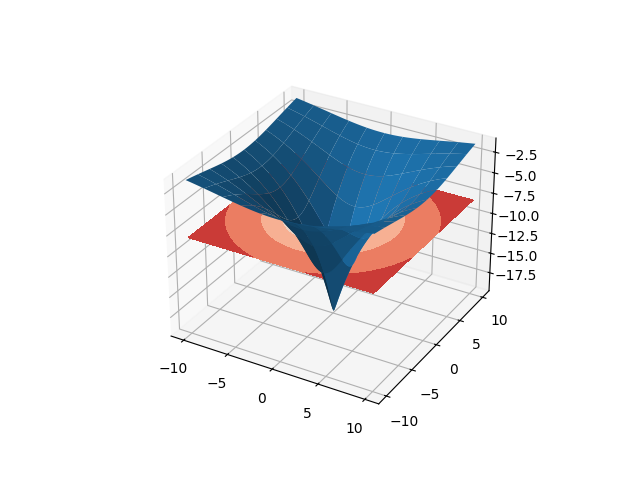

In [102]:
ax = plt.figure().add_subplot(projection = '3d')

x = np.linspace(lb[0],ub[0],100)
y = np.linspace(lb[1],ub[0],100)
xx,yy = np.meshgrid(x,y)
z = Alkey([xx,yy])
ax.plot_surface(xx, yy, z, cstride = 10, rstride = 10)
ax.contourf(xx,yy,z , zdir='z', cmap = 'coolwarm', offset = -8)

In [92]:
z = Alkey([xx,yy])
ax.plot_surface(xx, yy, z, cstride = 10, rstride = 10)